Michaela Carroll

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [24]:
mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [40]:
X = mushrooms_df.drop('type', axis=1)
y = mushrooms_df['type']

y = y.map({'p': 0, 'e': 1})

In [120]:
ordinal_features = ['odor', 'gill_size', 'bruises']


odor_categories = ['n', 'a', 'l', 'c', 'y', 'f', 'm', 'p', 's']  
gill_size_categories = ['n', 'b']  
bruises_categories = ['t' 'f']


preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(categories=[odor_categories, gill_size_categories, bruises_categories]), 
         ordinal_features)
    ]
)

In [132]:
ordinal_features = ['odor', 'gill_size', 'bruises']

odor_categories = ['n', 'a', 'l', 'c', 'y', 'f', 'm', 'p', 's']  
gill_size_categories = ['n', 'b']  
bruises_categories = ['t', 'f'] 


ordinal_transformer = OrdinalEncoder(
    categories=[odor_categories, gill_size_categories, bruises_categories]
)


preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_transformer, ordinal_features),
        ('categorical', categorical_transformer, categorical_features)
    ]
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [127]:
#logistic regression
logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegressionCV(cv=5, max_iter=1000, random_state=42))
])

#decision tree
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GridSearchCV(
        DecisionTreeClassifier(random_state=42),
        param_grid={'max_depth': [None, 10, 20]},
        cv=5
    ))
])

#random forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid={'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
        cv=5
    ))
])


print("Training models...")
logreg_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

Training models...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['n',
                                                                              'a',
                                                                              'l',
                                                                              'c',
                                                                              'y',
                                                                              'f',
                                                                              'm',
                                                                              'p',
                                                                              's'],
                                                                             ['n',
                                                                              'b'],
                                                                             ['t',
                                                                              'f']]),
                                                  ['odor', 'gill_size',
                                                   'bruises']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['cap_shape', 'cap_surface',
                                                   'cap_color', 'bruises',
                                                   'gill_attachment',
                                                   'gill_spacing',...
                                                   'stalk_shape', 'stalk_root',
                                                   'stalk_surface_above_ring',
                                                   'stalk_surface_below_ring',
                                                   'stalk_color_above_ring',
                                                   'stalk_color_below_ring',
                                                   'veil_type', 'veil_color',
                                                   'ring_type',
                                                   'spore_print_color',
                                                   'population',
                                                   'habitat'])])),
                ('classifier',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(random_state=42),
                              param_grid={'max_depth': [None, 10, 20],
                                          'n_estimators': [100, 200]}))])

In [128]:
y_pred_logreg = logreg_pipeline.predict(X_test)
y_pred_dt = dt_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)

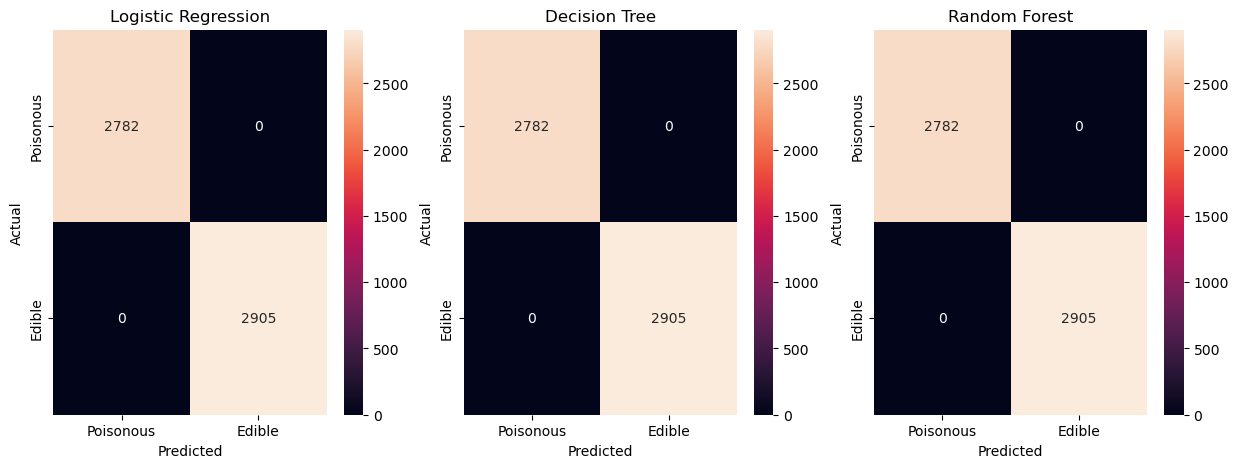

In [133]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt = 'd',
            xticklabels=['Poisonous', 'Edible'], 
            yticklabels=['Poisonous', 'Edible'], ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt = 'd',
            xticklabels=['Poisonous', 'Edible'], 
            yticklabels=['Poisonous', 'Edible'], ax=axes[1])
axes[1].set_title('Decision Tree')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt = 'd',
            xticklabels=['Poisonous', 'Edible'], 
            yticklabels=['Poisonous', 'Edible'], ax=axes[2])
axes[2].set_title('Random Forest')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.show()

In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, pos_label=0) 
recall = recall_score(y_test, y_pred_rf, pos_label=0) 

print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy:}")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")

Random Forest Model Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:

- Which model: Random Forest
- Hyper-parameters: n_estimators and max_depth
- Metrics
    - Accuracy: 100%
    - Recall: 100%
    - Precision: 100%
- How did you decide best? with all

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [ ]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')

In [145]:
def get_draft_day(round_num):
    if round_num == 1:
        return 0  #Day 1 
    elif round_num in [2, 3]:
        return 1  #Day 2
    else:
        return 2  #Day 3

In [147]:
nfl_draft['draft_day'] = nfl_draft['round'].apply(get_draft_day)
features = ['height', 'weight', 'forty', 'vertical', 'broad_jump', 'cone', 'shuttle']

X = nfl_draft[features].fillna(nfl_draft[features].mean())
y = nfl_draft['draft_day']

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

Accuracy: 0.48156182212581344


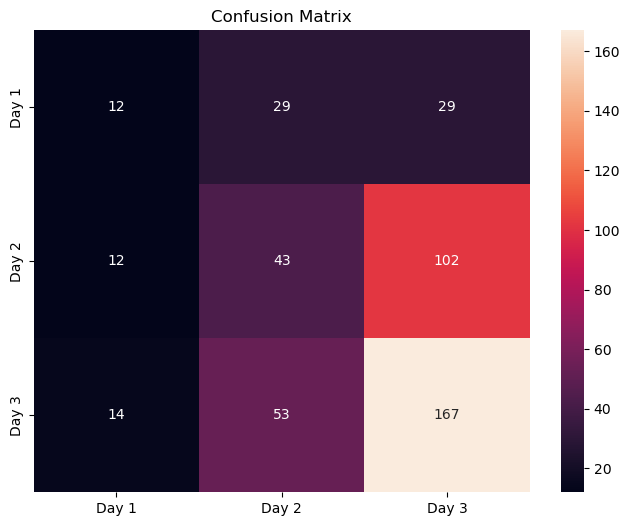

In [150]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print(f"Accuracy: {accuracy_score(y_test, y_pred):}")

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=['Day 1', 'Day 2', 'Day 3'],
            yticklabels=['Day 1', 'Day 2', 'Day 3'])
plt.title('Confusion Matrix')
plt.show()   

### Problem 2 Questions

 - Which kind of model did you use and why did you choose it? I chose a random forest model because its a multi class prediction (day 1 , day 2
 - What was your accuracy? 48% accuracy